In [9]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [10]:
backtested_strategy_returns_df = pd.read_csv('Backtested_strategy_returns.csv', index_col=0)
individual_security_returns_df = pd.read_csv('Individual_security_returns.csv', index_col=0)
backtested_strategy_returns_array = np.array(backtested_strategy_returns_df['Backtested strategy'])

display(backtested_strategy_returns_df.tail())

,S&P 500,iShares Global Tech ETF,iShares Global Healthcare ETF,FTSE 100,ESTX 50 PR.EUR,Nikkei 225,iShares MSCI Emerging Markets ETF,U.S. Treasury Bond Futures,Lyxor Core FTSE Actuaries UK Gilts 0-5Y,Backtested strategy
2020-09-16,-8.175877e-08,-0.003874,-3.030601e-08,-5.476405e-07,1.739185e-07,0.000649,-4.432901e-08,-1.230159e-07,0.000000e+00,-0.003226
2020-09-17,-1.489051e-07,-0.001941,-3.032273e-08,-5.826719e-07,-5.874604e-07,-0.004905,-1.331597e-07,1.056488e-07,1.395719e-07,-0.006847
2020-09-18,-1.979400e-07,-0.003554,-3.792566e-08,-8.760857e-07,-8.731682e-07,0.001294,-2.599596e-07,-2.646936e-07,2.788180e-08,-0.002262
2020-09-20,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
2020-09-21,-6.846324e-18,0.000966,-2.412530e-17,-0.000000e+00,-0.000000e+00,0.000000,-1.234584e-03,2.266029e-03,5.336027e-19,0.001997


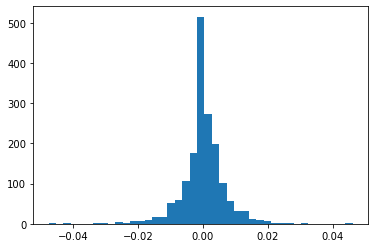

In [11]:
plt.hist(backtested_strategy_returns_df['Backtested strategy'], bins=int(np.sqrt(backtested_strategy_returns_df.shape[0])))
plt.show()

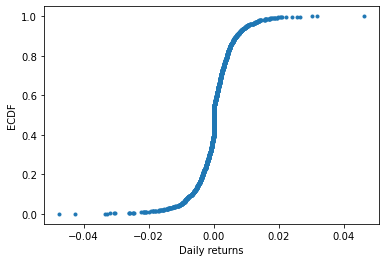

In [12]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, 1 + n) / n

    return x, y

x, y = ecdf(backtested_strategy_returns_array)
# Generate plot
_ = plt.plot(x, y, marker ='.', linestyle ='none')

# Label the axes
_ = plt.xlabel('Daily returns')
_ = plt.ylabel('ECDF')

# Display the plot
plt.show()
